## HR Analytics Employee Attrition & Performance

#### Objective: 

To identify key factors contributing to employee attrition and performance using the IBM HR Analytics dataset. This analysis aims to help HR departments reduce turnover and improve workforce management by:

* Understanding which variables most influence attrition.

* Predicting which employees are at higher risk of leaving.

* Providing actionable insights for improving employee satisfaction and retentio


#### Dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### 2. Load Datasaet

In [2]:
df = pd.read_csv(r'C:\Users\dimas\Downloads/Human_Resources.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 3. Understanding Data

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### 4. Data Cleaning

###### 4.1 Handling Missing Values (NA/null)

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

###### 4.2 Handling Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

###### 4.3 Data Type Conversion

In [9]:
df['Attrition']= df['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

In [10]:
df['OverTime']= df['OverTime'].apply(lambda x:1 if x=='Yes' else 0)

df['Over18']= df['Over18'].apply(lambda x:1 if x=='Y' else 0)

#### 5. Exploratory Data Analysis

###### 5.1 Distribution

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

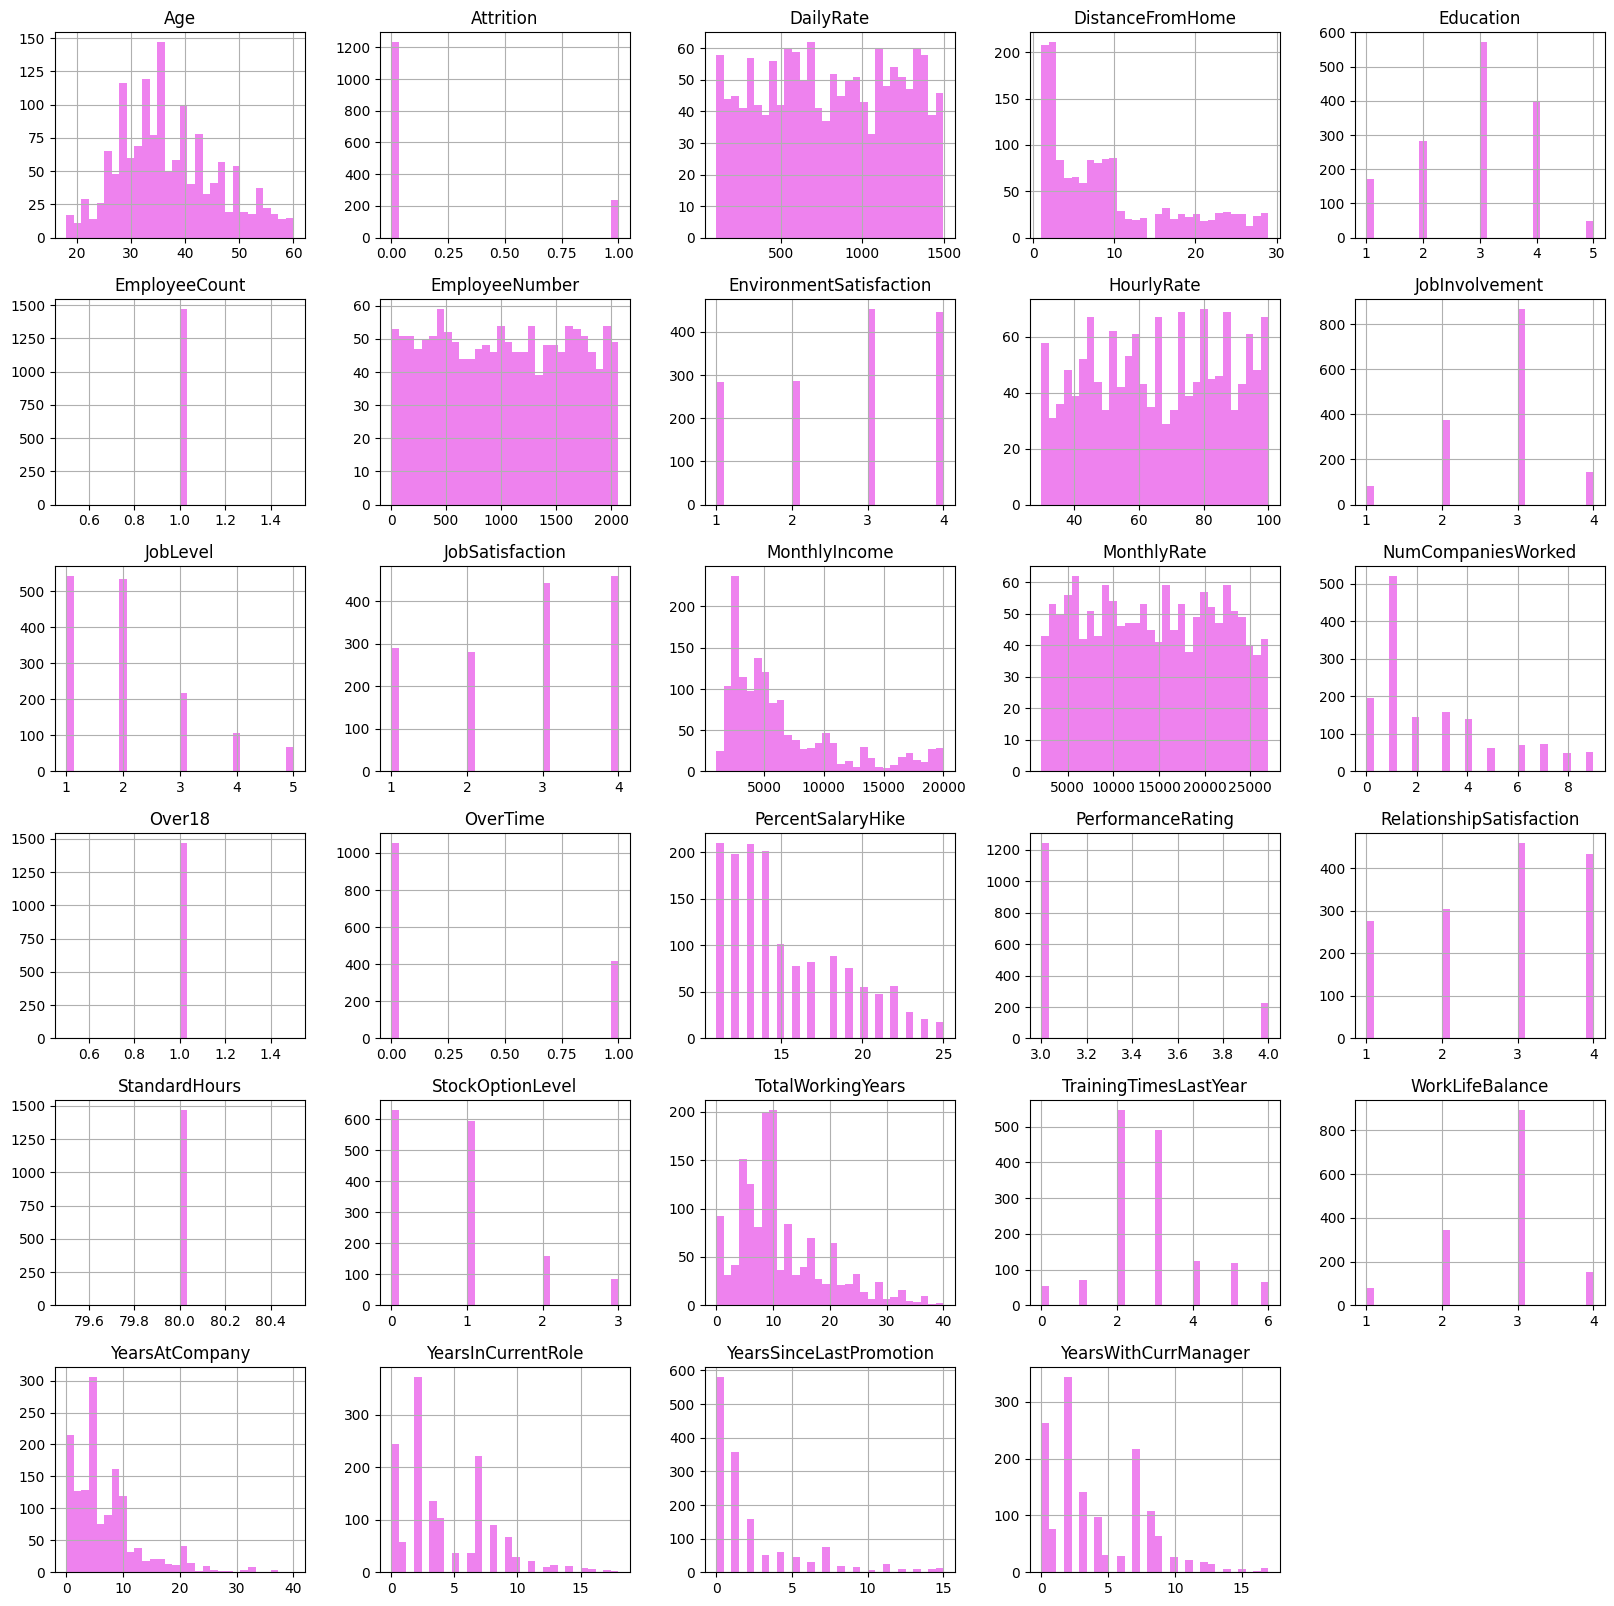

In [11]:
df.hist(bins = 30, figsize = (20,20), color = 'violet',)

##### 5.2 Drop Unncessary Columns

In [12]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

##### 5.3 Questions and EDA

###### 5.3.1 how many employees left the company

In [13]:
left_df        = df[df['Attrition'] == 1]
stayed_df      = df[df['Attrition'] == 0]

In [14]:
print("Total =", len(df))

print("Number of employees who left the company =", len(left_df))
print("Number of employees who did not leave the company (stayed) =", len(stayed_df))

Total = 1470
Number of employees who left the company = 237
Number of employees who did not leave the company (stayed) = 1233


In [15]:
print("Percentage of employees who left the company =", len(left_df) / len(df) * 100, "%")
print("Percentage of employees who did not leave the company (stayed) =",len(stayed_df) / len(df) * 100, "%")

Percentage of employees who left the company = 16.122448979591837 %
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


##### 5.3.2 Descriptive Statistics of Left Employee and Stayed Employee

In [16]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


##### 5.3.3 Correlation Between Features

<Axes: >

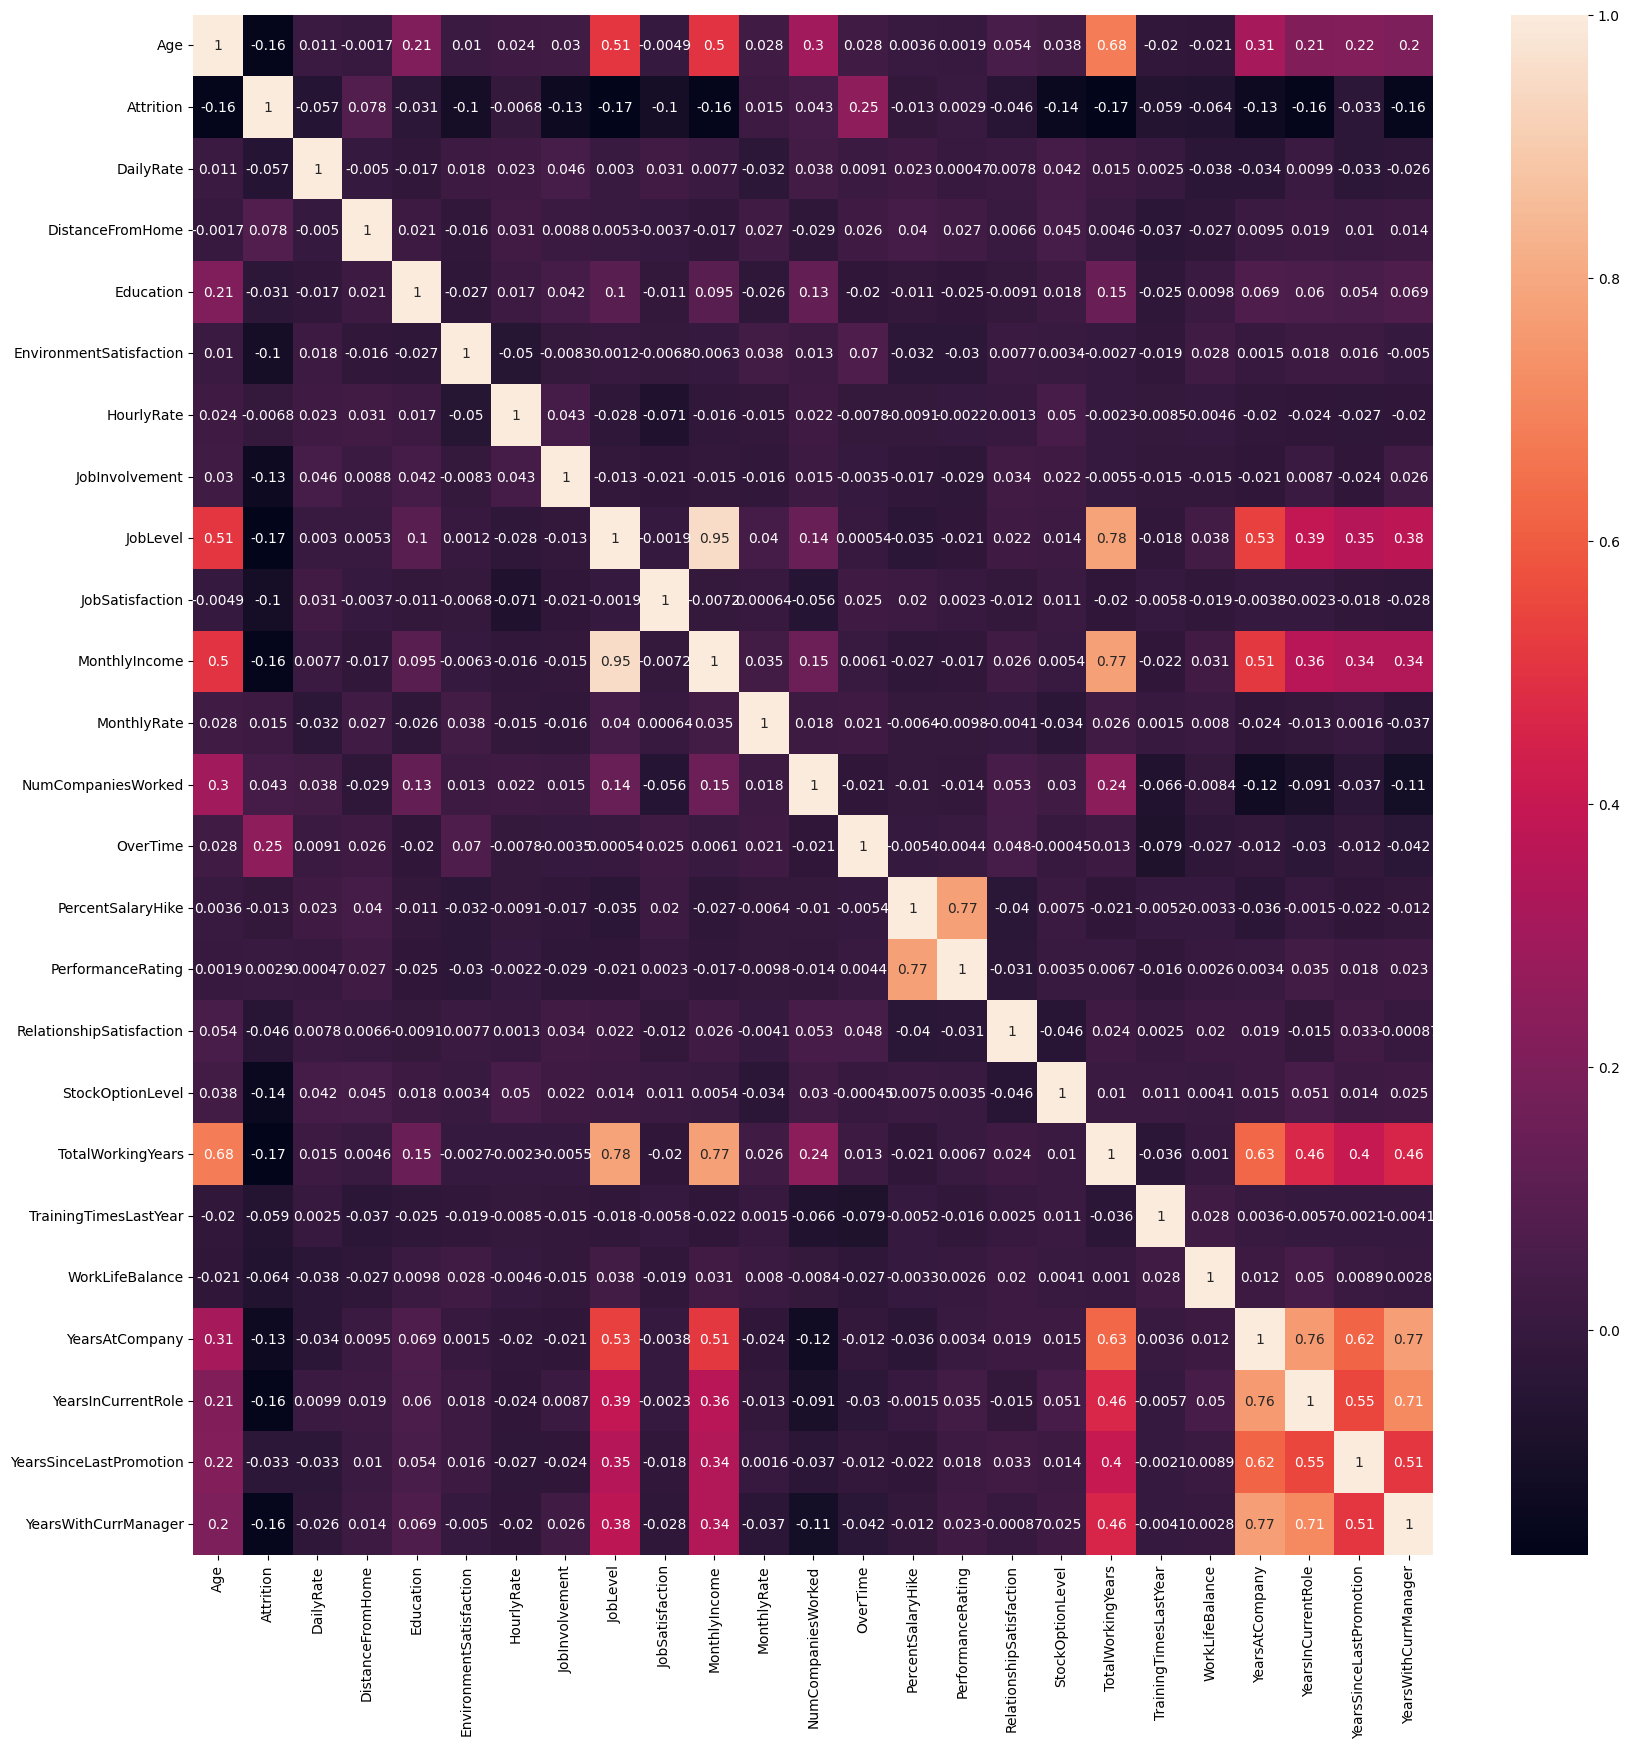

In [18]:
correlations = df.select_dtypes(include='number').corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [19]:
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

##### 5.3.4 What is relationship between Age and Attrition

<Axes: xlabel='Age', ylabel='count'>

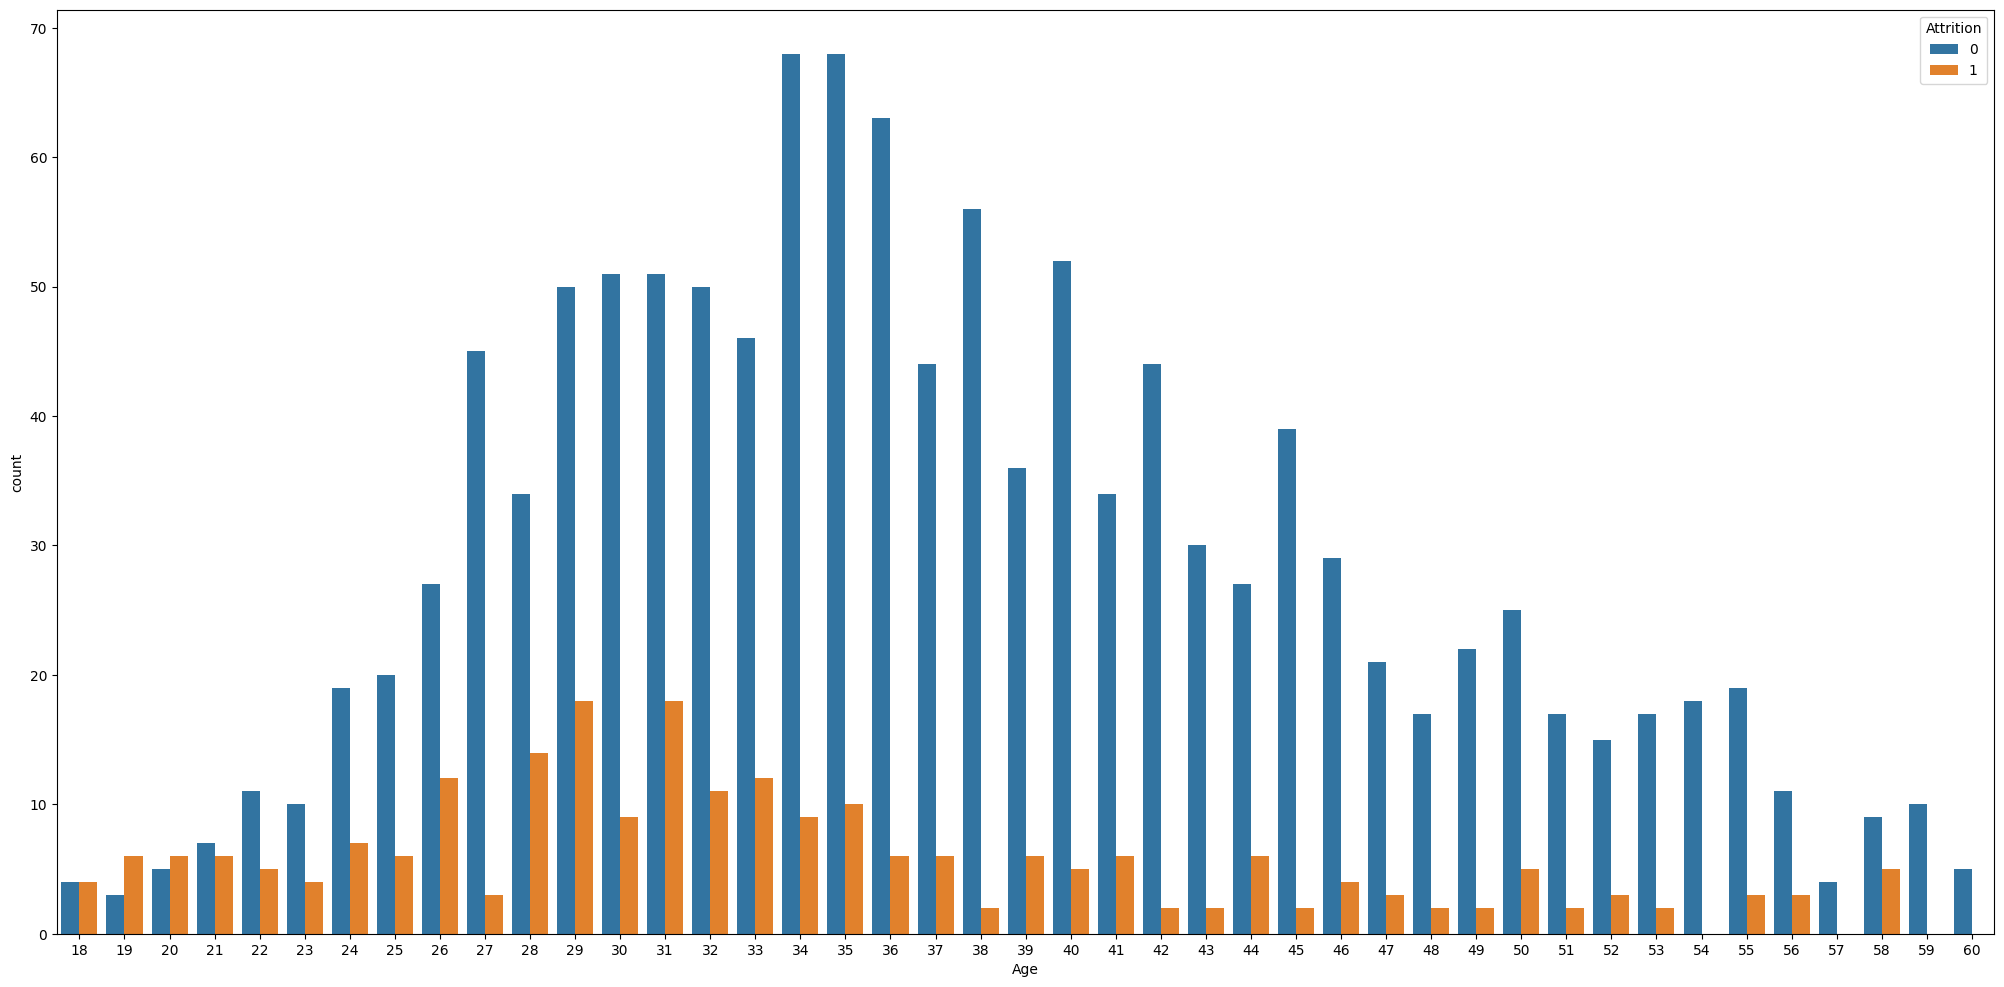

In [20]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

##### 5.3.5 What is relationship between Marital Status and Attrition

<Axes: xlabel='MaritalStatus', ylabel='count'>

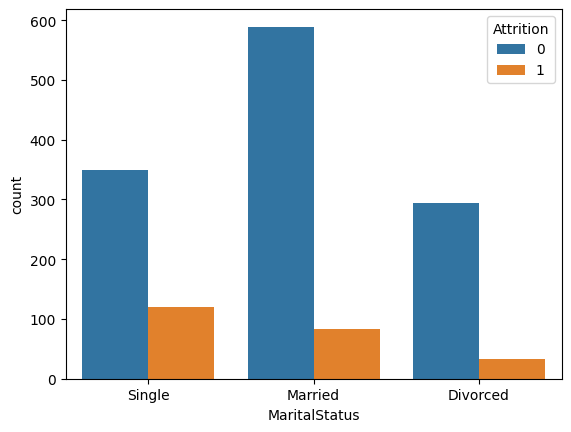

In [21]:
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)

##### 5.3.6 What is relationship between Job Role and Attrition

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

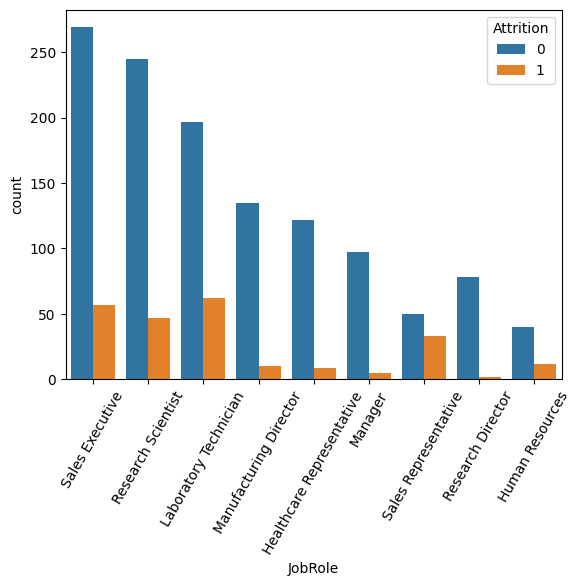

In [22]:
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.xticks(rotation=60)

##### 5.3.7 What is relationship between Job Involvement and Attrition

<Axes: xlabel='JobInvolvement', ylabel='count'>

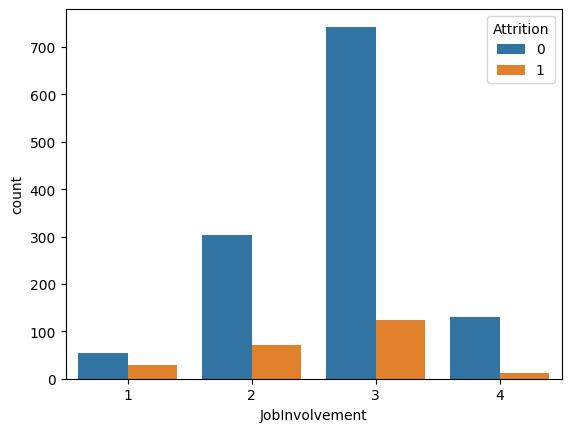

In [23]:
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)

##### 5.3.8 What is relationship between Job Level and Attrition

<Axes: xlabel='JobLevel', ylabel='count'>

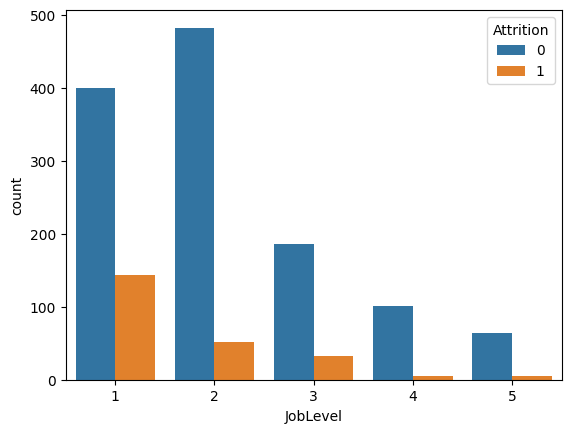

In [24]:
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

In [25]:
# Younger people are actually leave compared to older people
# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

##### 5.3.9 What is the Difference in Distance From Home Between Employees Who Stayed and Those Who Left?

Text(0.5, 0, 'Distance From Home')

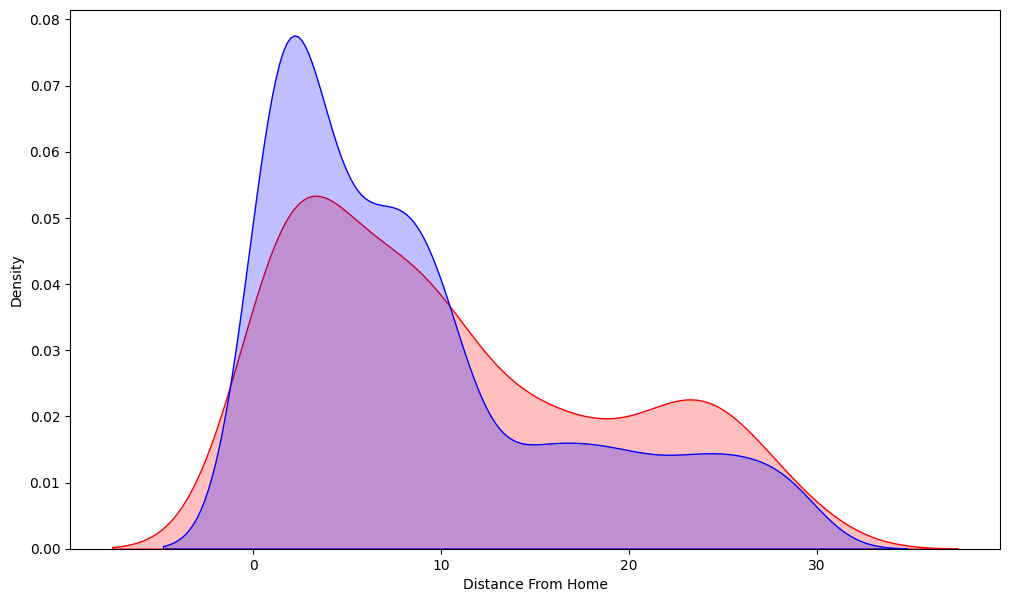

In [26]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

##### 5.3.10 What is the Difference in Experience Working with Manager  Between Employees Who Stayed and Those Who Left?

Text(0.5, 0, 'Years With Current Manager')

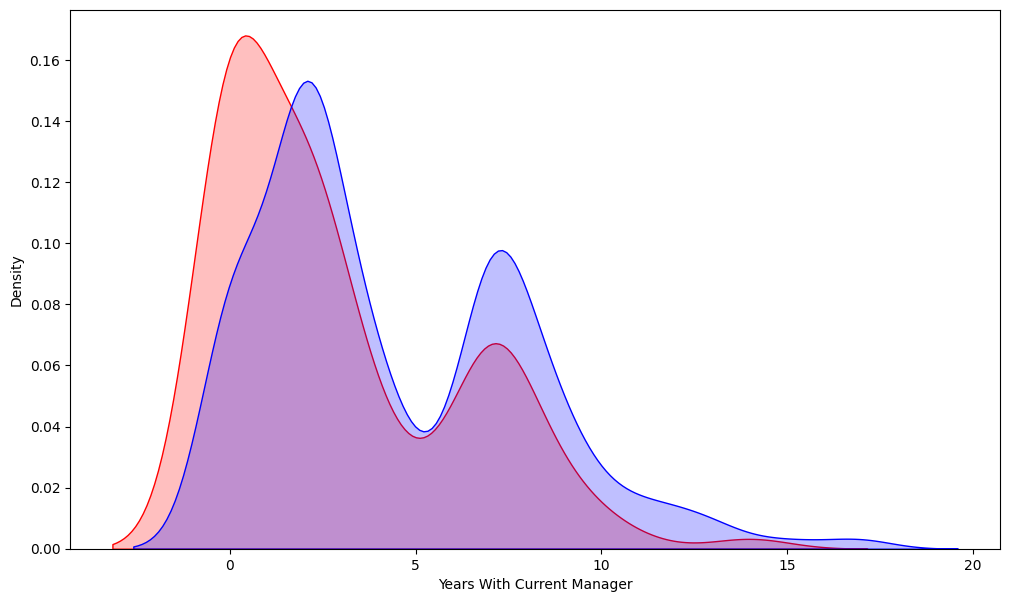

In [27]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

##### 5.3.11 What is the Difference in Working Years Between Employees Who Stayed and Those Who Left?

Text(0.5, 0, 'Total Working Years')

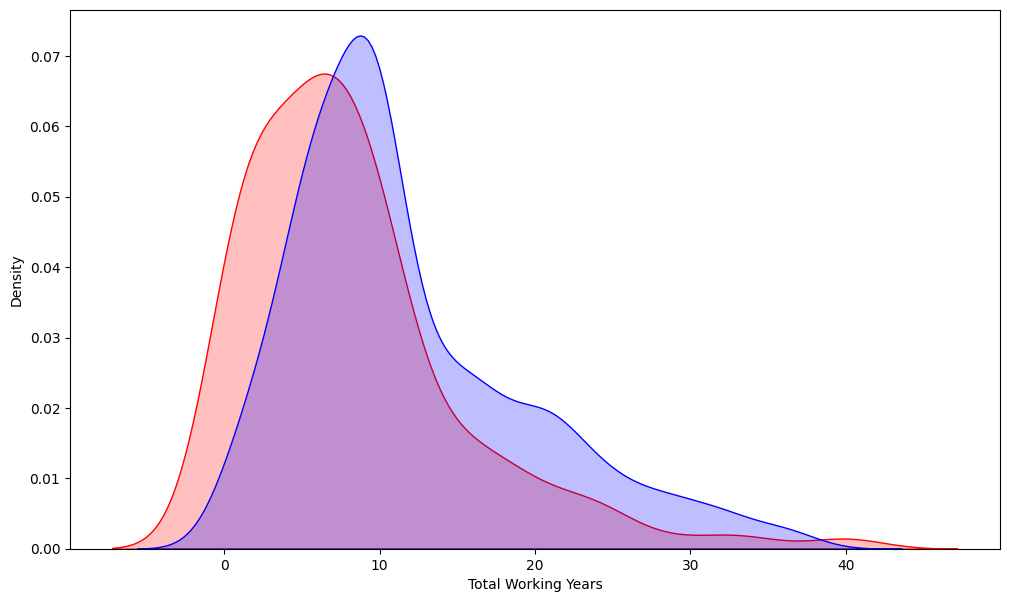

In [28]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

##### 5.3.12 Gender vs Monthly Income

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

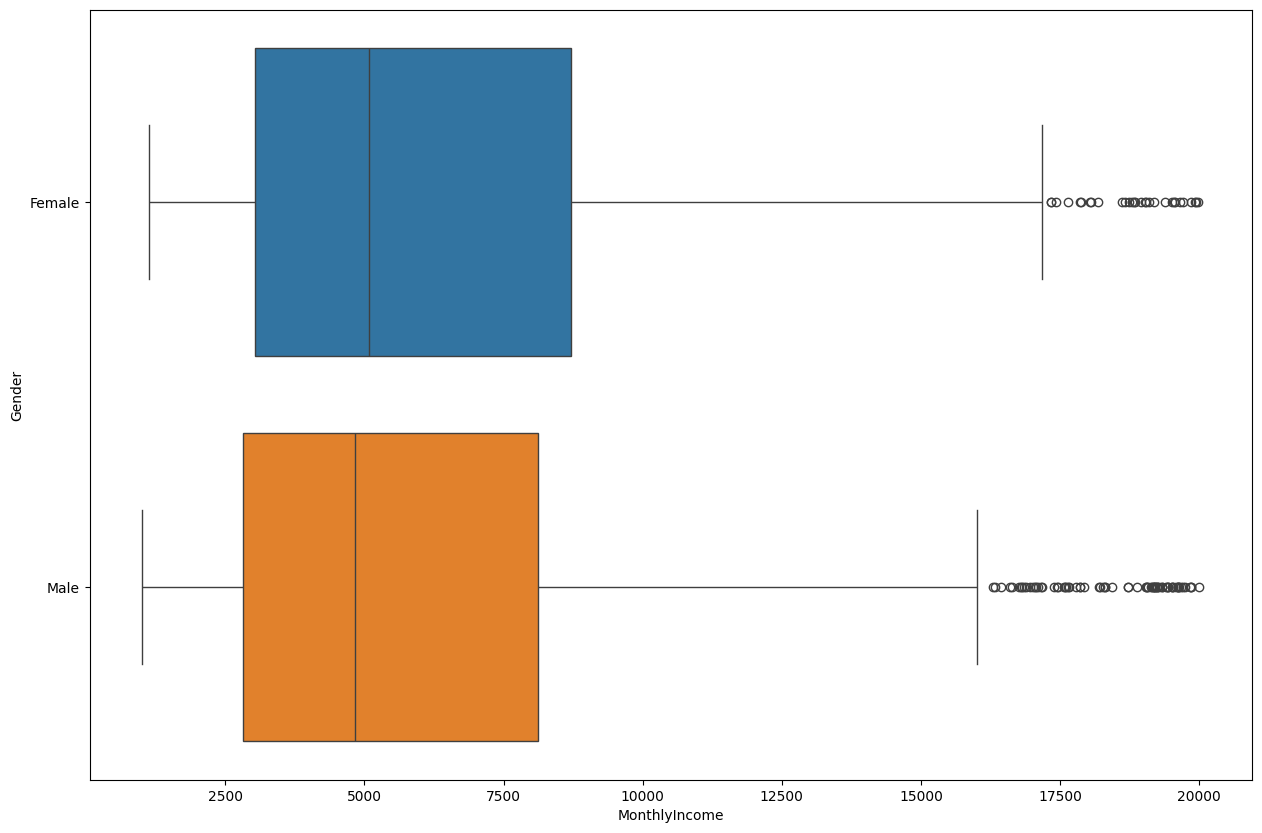

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df, hue='Gender')

##### 5.3.13. Monthly income vs. Job Role

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

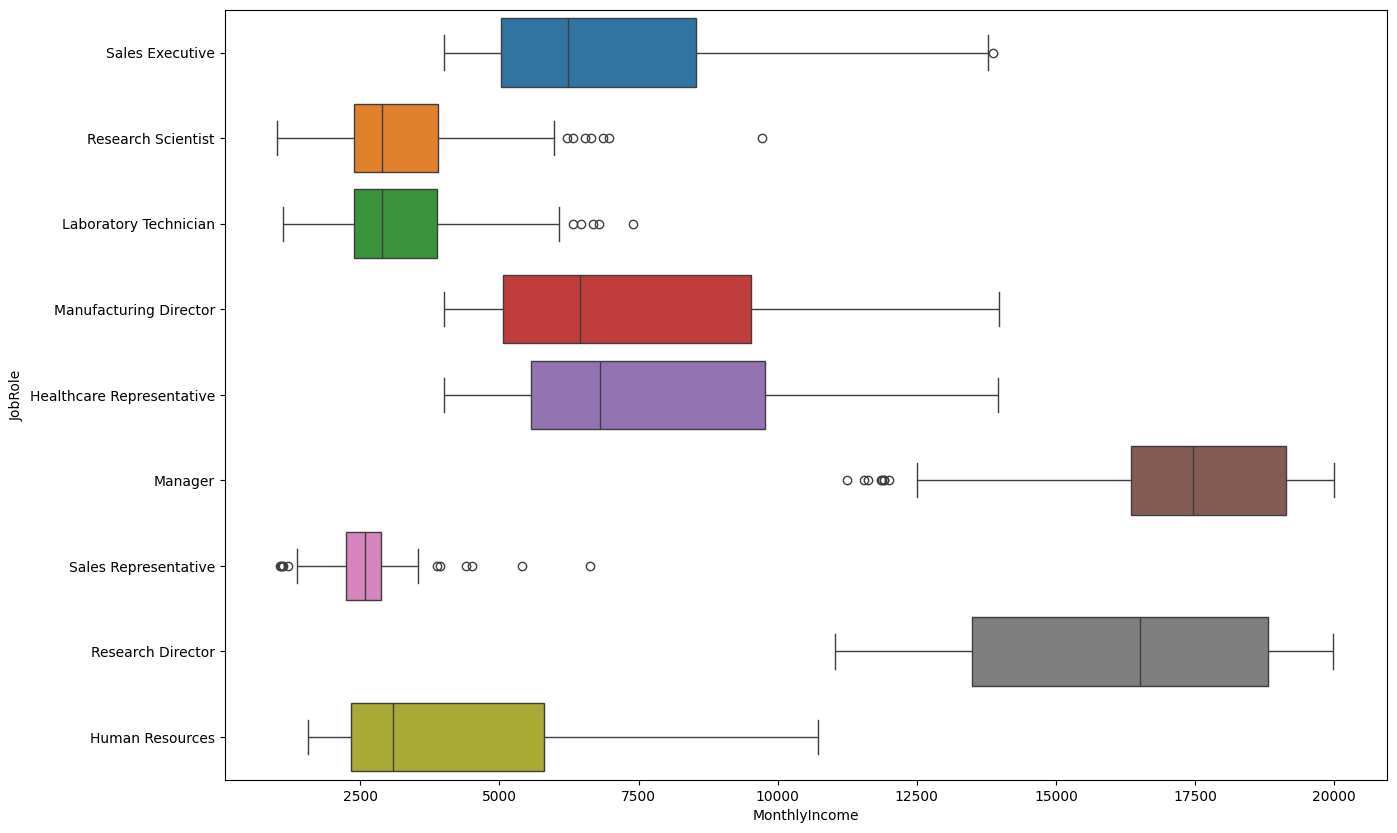

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df, hue='JobRole')

In [31]:
# When the distance from home increase the attrition would probably increase
# If the employee have a small number of years with the current manager they tend to leave more
# if employee have 0-7 years experience they will tend to leave more
# Gender pay almost equal and female get paid even more
# employee that work as manager and research directors got paid more. Om the other hand Sales, Research Scientist,Laboratory Technician got paid less

## Create Testing and Training Dataset

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


##### 6.1 Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#####  6.2 Encode target 'Attrition'

In [34]:
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

##### 6.3 Encode other categorical features

In [35]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [36]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

##### 7. Feature Selection

###### 7.1 Correlation Analysis

In [37]:
corr_matrix_all = df.corr(numeric_only=True)
corr_matrix = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(corr_matrix)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

###### 7.2 Visualize the correlations

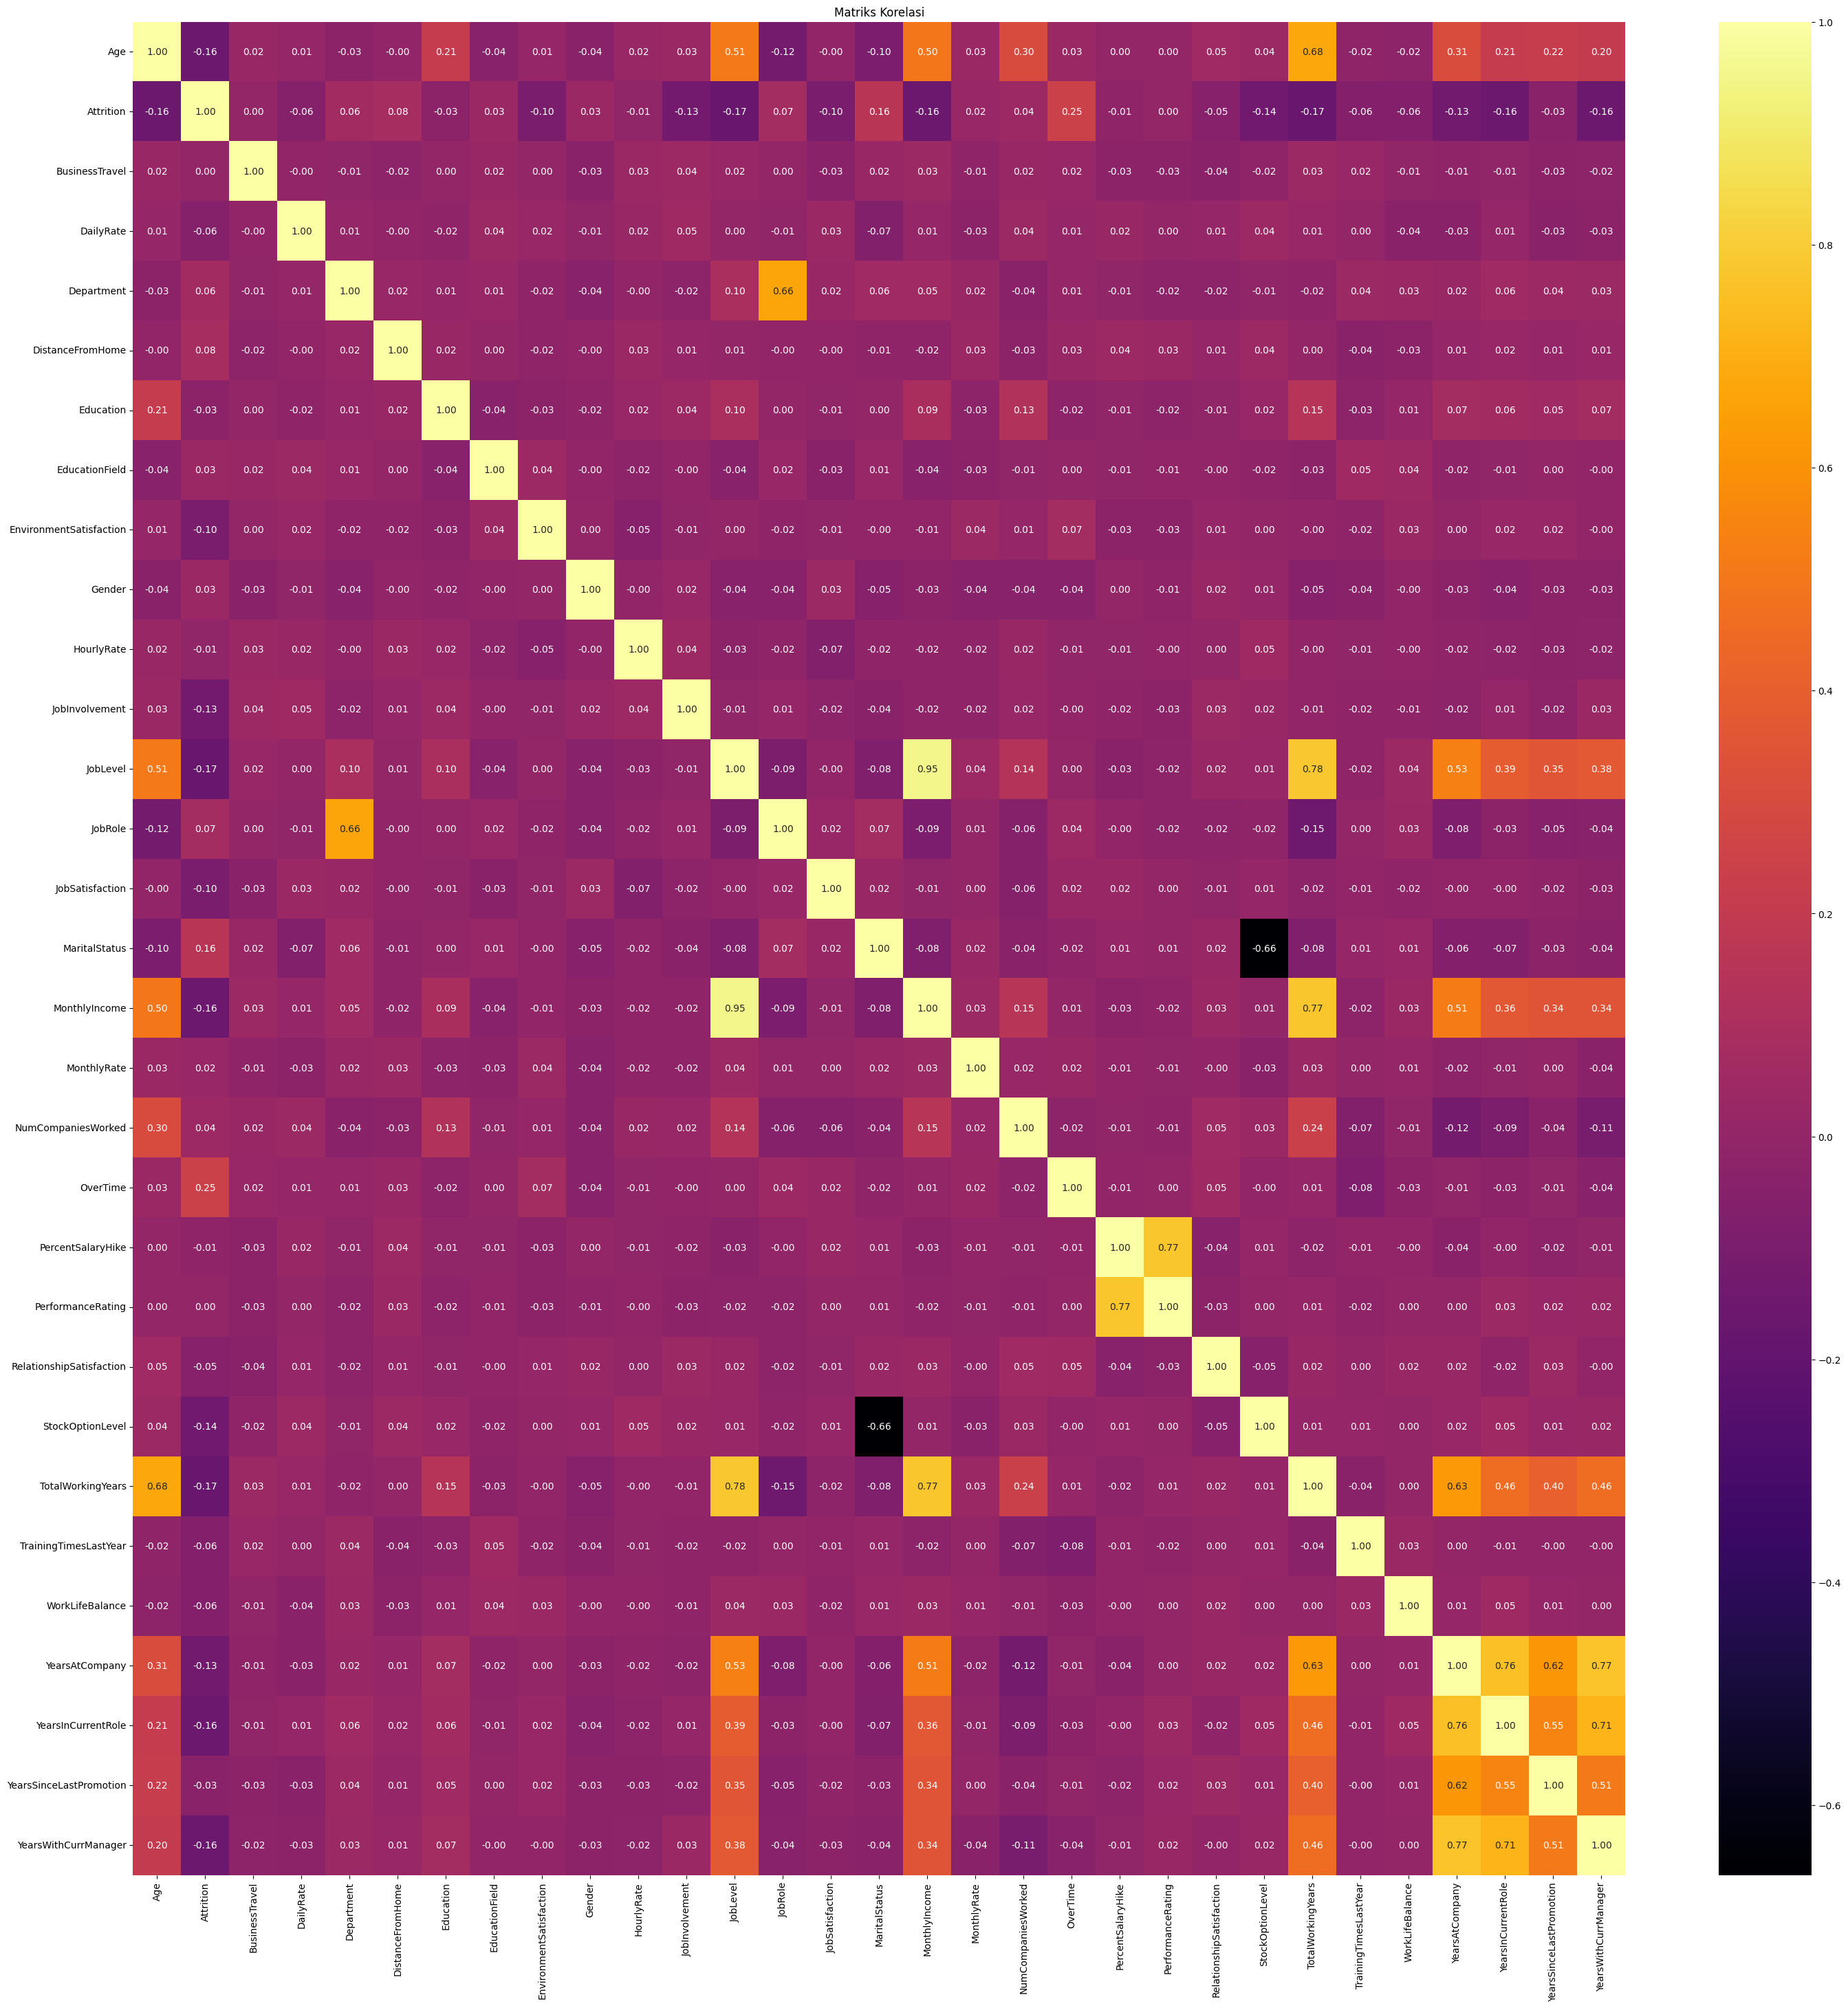

In [38]:
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix_all, annot=True, fmt='.2f', cmap='inferno')
plt.title("Matriks Korelasi")
plt.show()

##### 7.3 Feature Selection Based on Correlation (threshold absolut > 0.05)

In [39]:
threshold = 0.05
selected_features = corr_matrix[abs(corr_matrix) > threshold].index.drop('Attrition')

In [40]:
print(f"\nFeature Selection > {threshold} or < -{threshold}):")
print(selected_features.tolist())


Feature Selection > 0.05 or < -0.05):
['OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole', 'Department', 'DailyRate', 'TrainingTimesLastYear', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']


###### 7.5 Create Features and Target Variable

In [41]:
X = df[selected_features]
y = df['Attrition']

In [42]:
X.shape

(1470, 19)

### 8. Train and Evaluate Random Forest Classifier

##### 8.1 Train and Split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [44]:
X_train.shape

(1102, 19)

In [45]:
X_test.shape

(368, 19)

##### 8.2 Perform Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

##### 8.3  Evaluate Random Forest

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

###### Accuracy Score

In [49]:
print("Accuracy {} %".format( accuracy_score(y_pred, y_test) * 100 ))

Accuracy 85.32608695652173 %


###### Confusion Matrix

<Axes: >

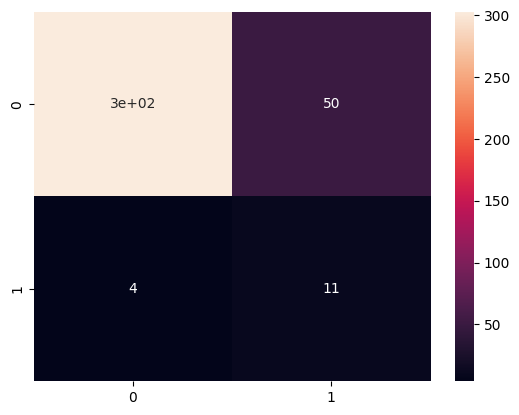

In [50]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

###### Classification Report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       307
           1       0.73      0.18      0.29        61

    accuracy                           0.85       368
   macro avg       0.80      0.58      0.60       368
weighted avg       0.84      0.85      0.81       368



#### Feature Importance

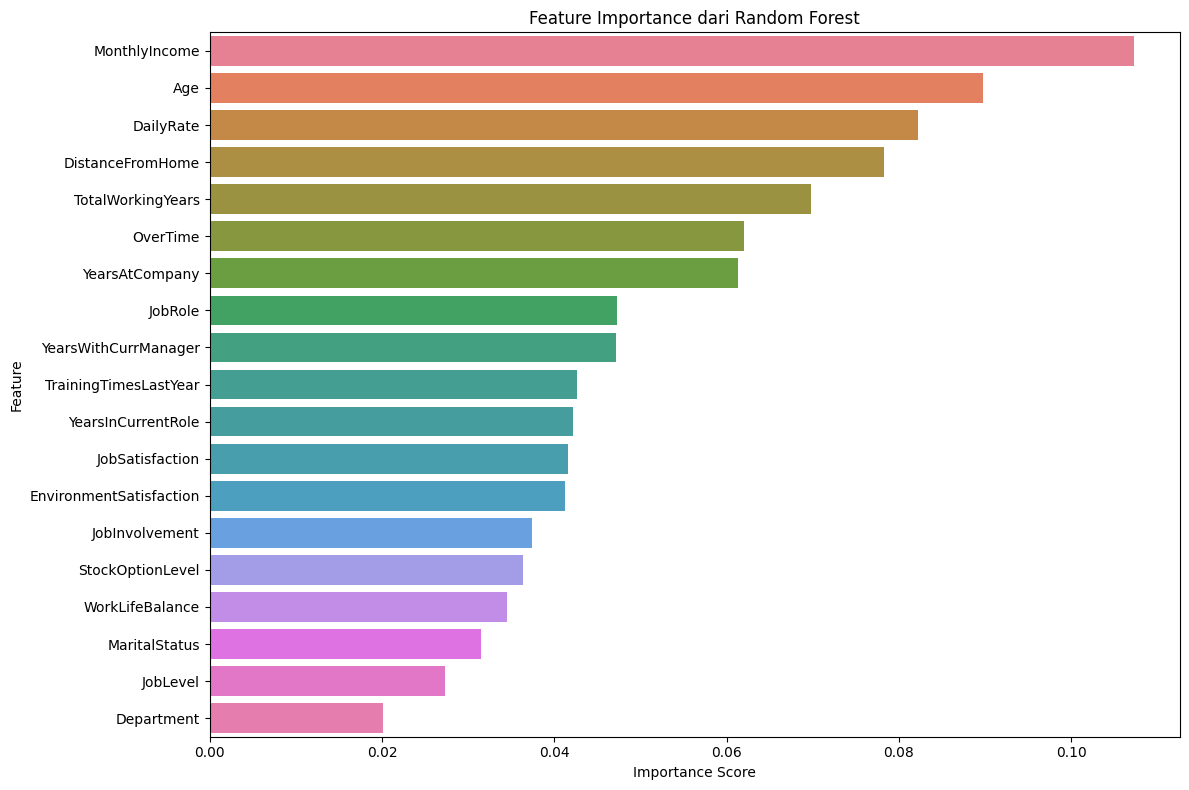

In [52]:
importances = model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X.columns[indices], hue=X.columns[indices])
plt.title("Feature Importance dari Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

##  Key Insights & Recommendations

### 1.  Younger Employees Leave More Often
- Younger employees, especially those with **0–7 years of experience**, have higher attrition rates.
-  **Recommendation**: Create career development programs and mentorship opportunities to retain young talent.

### 2.  Income Correlates with Retention
- `MonthlyIncome` is one of the most important factors; it’s highly correlated with `JobLevel` and `TotalWorkingYears`.
-  **Recommendation**: Ensure fair salary progression for junior roles to improve motivation and reduce attrition.

### 3.  Personal Status Affects Loyalty
- **Single employees** leave more than married or divorced ones.
-  **Recommendation**: Promote a sense of belonging through community-building initiatives and employee resource groups.

### 4.  Long Commutes Contribute to Attrition
- Attrition increases as `DistanceFromHome` increases.
-  **Recommendation**: Offer flexible work options or commuting assistance for long-distance employees.

### 5.  Job Role and Engagement Matter
- **Sales Representatives** are more likely to leave.
- Low job involvement and job satisfaction increase attrition.
-  **Recommendation**: Regularly assess employee engagement and provide rotation or internal mobility options to high-risk roles.

### 6.  Relationship with Manager Is Critical
- Employees with **shorter tenure under the same manager** are more likely to leave.
-  **Recommendation**: Invest in leadership and communication training for managers to improve retention.

### 7.  Gender Pay Is Balanced
- Gender-based income is relatively equal; in some cases, **females earn slightly more**.
-  No immediate action required, but continue monitoring pay equity.

--- 
### Feature Importance (Random Forest)

Top features contributing to attrition prediction:
- MonthlyIncome
- DailyRate
- Age
- DistanceFromHome
- OverTime

## Conclusion

This analysis highlights the most influential factors behind employee attrition and offers data-driven recommendations to reduce turnover.
By focusing on young, low-level, disengaged, or distant employees, and by strengthening managerial relationships, companies can proactively retain valuable talent.